Niko McCarty

Goal is to make a 1D random walker and a 2D random walker to display next to it, all with Panel (users can select probabilities and click a button to generate a new "random walk" with fixed number of steps, e.g. 10,000

In [4]:
import numpy as np
import bokeh.io
import bokeh.plotting
import bokeh.layouts
import bokeh.palettes
from bokeh.models import *
bokeh.io.output_file('random_walk.html')
colors = {'black':'#444147', 'purple': '#7E59A2', 'orange':'#E39943'} 

In [ ]:
# Probability to move up or down 
prob = [0.5, 0.50]   
  
# statically defining the starting position 
start = 2  
positions = [start] 
  
# creating the random points 
rr = np.random.random(1000) 
downp = rr < prob[0] 
upp = rr > prob[1] 
  
  
for idownp, iupp in zip(downp, upp): 
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up) 

In [3]:

# Define the initial number of steps
n_steps = int(1E5)

# Assemble the three necessary data sources
source = ColumnDataSource({'x':[], 'y':[]})
current_position = ColumnDataSource({'x':[], 'y':[]})
display_source = ColumnDataSource({'x':[], 'y':[]})

# Define the interactive components
run_button = Button(label='click to generate a random walk')
step_slider = Slider(title='number of steps', start=10, end=int(n_steps), step=1,
                    value=10, bar_color=colors['purple'])

# Define the javascript for each component
generate_walk = """

// Instantiate position vectors
var xs = [0]
var ys = [0]

// Loop through each step, starting with the second.
for (var i = 1; i < n_steps; i++) { 

    // Determine a random angle to step towards
    theta = Math.random() * 2 * Math.PI;

    // Compute and store the new xy positions
    xs.push(xs[i - 1] + Math.cos(theta)); 
    ys.push(ys[i - 1] + Math.sin(theta)); }


// Update the data source
source.data['x'] = xs;
source.data['y'] = ys;
source.change.emit()

// Reset the step slider to the default value
stepSlider.value = 10;
"""

display_steps = """
// Determine where to start slicing the inset data
if (stepSlider.value < 5000) {
    var init = 0;
}
else { 
    var init = stepSlider.value - 5000;
}

// Assign the inset data for display
display_source.data['x'] = source.data['x'].slice(init, stepSlider.value);
display_source.data['y'] = source.data['y'].slice(init, stepSlider.value);

// Highlight the current position -- Can do this with an indexfilter as well
current_position.data['x'] = display_source.data['x'].slice(-1);
current_position.data['y'] = display_source.data['y'].slice(-1);

// Update the data sources
display_source.change.emit()
current_position.change.emit()
"""


# Define and assignthe callbacks
args={'stepSlider':step_slider, 'source':source,
'display_source':display_source, 'current_position':current_position,
'n_steps':n_steps}
generate_cb = CustomJS(args=args, code=generate_walk + display_steps)
display_cb = CustomJS(args=args, code=display_steps)
run_button.js_on_click(generate_cb)
step_slider.js_on_change('value', display_cb)

# Define the axes
overview_ax = bokeh.plotting.figure(width=300, height=300, match_aspect=True,
                x_axis_label = 'x position', y_axis_label='y position')
inset_ax = bokeh.plotting.figure(width=300, height=300, match_aspect=True,
                x_axis_label='x position', y_axis_label = 'y position')

# Populate teh axes
overview_ax.circle('x', 'y', source=current_position, color=colors['orange'],
level='overlay', size=5)
overview_ax.square('x', 'y', source=current_position, fill_color='grey', fill_alpha=0.25,
line_color=colors['orange'], level='overlay', size=30)
overview_ax.line('x', 'y', source=source, color=colors['black'], line_width=0.5,
alpha=0.5)

inset_ax.line('x', 'y', source=display_source, color=colors['purple'], line_width=0.5, alpha=1)
inset_ax.circle('x', 'y', source=current_position, color=colors['orange'],
level='overlay', size=5)


# Define the layout
row = bokeh.layouts.row(overview_ax, inset_ax)
lay = bokeh.layouts.column(run_button, step_slider, row)

NameError: name 'ColumnDataSource' is not defined

1D walker

In [1]:
# Python code for 1-D random walk. 

  

  
# plotting down the graph of the random walk in 1D 
plt.plot(positions) 
plt.show() 

<Figure size 640x480 with 1 Axes>

2D walker

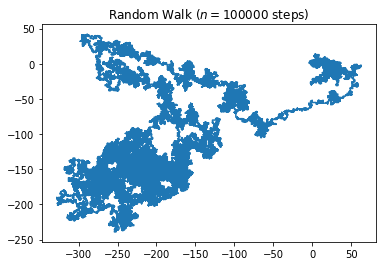

In [2]:
# Python code for 2D random walk. 

  
# defining the number of steps 
n = 100000
  
#creating two array for containing x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = numpy.zeros(n) 
y = numpy.zeros(n) 
  
# filling the coordinates with random variables 
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
      
  
# plotting stuff: 
pylab.title("Random Walk ($n = " + str(n) + "$ steps)") 
pylab.plot(x, y) 
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600) 
pylab.show() 